<h1>Final Project: Analysis of League of Legend Games</h1>
<h2>Questions to Answer</h2>
    <ul>
        <li>
        Very widely played gamed; over 100 million players
        </li>
        <li>
        No easy way to see statistics of the game however
        </li>
        <li>
        What were the most picked vs. the most banned champions in Season 8?
        </li>
        <li>
        What were the most played vs. the least played types of champions?
        </li>
        <li>
        What were the most used vs. the least used summoner spells?
        </li>
        <li>
        Which side of the map got which objectives first?
        </li>

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import json
sns.set_style('darkgrid')

%matplotlib inline

<h1>The Methods Below Convert IDs to Names and Return Tags for Champions</h1>

In [4]:
def idToName(ID, dic):
    '''
    Used to convert ID's to champion names
    '''
    champ = dic['name'][ID]
    return champ

def getTag(name, data):
    '''
    Used to get primary tag from champInfo
    '''
    tags = data['tags'][name][0]
    return tags

def numToColor(data):
    '''
    Used to get color of team from 0 or 1
    '''
    if data == 0:
        color = 'blue'
    else:
        color = 'red'
    return color

<h2>Let's Read the File that Contains the Games</h2>

In [26]:
df = pd.read_csv('games.csv')
print(df)

           gameId   creationTime  gameDuration  seasonId  winner  firstBlood  \
0      3326086514  1504279457970          1949         9       1           2   
1      3229566029  1497848803862          1851         9       1           1   
2      3327363504  1504360103310          1493         9       1           2   
3      3326856598  1504348503996          1758         9       1           1   
4      3330080762  1504554410899          2094         9       1           2   
...           ...            ...           ...       ...     ...         ...   
51485  3308904636  1503076540231          1944         9       2           1   
51486  3215685759  1496957179355          3304         9       2           1   
51487  3322765040  1504029863961          2156         9       2           2   
51488  3256675373  1499562036246          1475         9       2           2   
51489  3317333020  1503612754059          1445         9       1           1   

       firstTower  firstInhibitor  firs

<h2>Let's Read the File that Contains the Champion Names and Titles</h2>

In [6]:
jsonDict = pd.read_json('champion_info_2.json')
champInfo = pd.read_json((jsonDict['data']).to_json(), orient='index')
champInfo.head()

,id,key,name,tags,title
Aatrox,266,Aatrox,Aatrox,"[Fighter, Tank]",the Darkin Blade
Ahri,103,Ahri,Ahri,"[Mage, Assassin]",the Nine-Tailed Fox
Akali,84,Akali,Akali,[Assassin],the Fist of Shadow
Alistar,12,Alistar,Alistar,"[Tank, Support]",the Minotaur
Amumu,32,Amumu,Amumu,"[Tank, Mage]",the Sad Mummy


<h2>Let's Read the File that Contains the List of Summoner Spells</h2>

In [7]:
spellJson = pd.read_json('summoner_spell_info.json')
spellInfo = pd.read_json((spellJson['data']).to_json(),orient='index')
spellInfo.head()

,description,id,key,name,summonerLevel
1,Removes all disables (excluding suppression an...,1,SummonerBoost,Cleanse,6
11,Deals 390-1000 true damage (depending on champ...,11,SummonerSmite,Smite,10
12,"After channeling for 4.5 seconds, teleports yo...",12,SummonerTeleport,Teleport,6
13,Restores 50% of your champion's maximum Mana. ...,13,SummonerMana,Clarity,1
14,"Ignites target enemy champion, dealing 70-410 ...",14,SummonerDot,Ignite,10


<h2>Replace the ID with the Champion Name</h2>

In [8]:
champInfo.set_index(['id'], inplace=True)
champInfo.head()

,key,name,tags,title
id,,,,
266,Aatrox,Aatrox,"[Fighter, Tank]",the Darkin Blade
103,Ahri,Ahri,"[Mage, Assassin]",the Nine-Tailed Fox
84,Akali,Akali,[Assassin],the Fist of Shadow
12,Alistar,Alistar,"[Tank, Support]",the Minotaur
32,Amumu,Amumu,"[Tank, Mage]",the Sad Mummy


<h2>Let's Create Columns that Show Each Team's Champion Selection, Ban, and Summoner Spells</h2>

In [9]:
champCols = ['t1_champ1id','t1_champ2id','t1_champ3id','t1_champ4id','t1_champ5id',
             't2_champ1id','t2_champ2id','t2_champ3id','t2_champ4id','t2_champ5id']
banCols = ['t1_ban1','t1_ban2','t1_ban3','t1_ban4','t1_ban5',
             't2_ban1','t2_ban2','t2_ban3','t2_ban4','t2_ban5',]
sumSpellsCols = ['t1_champ1_sum1','t1_champ1_sum2','t1_champ2_sum1','t1_champ2_sum2','t1_champ3_sum1','t1_champ3_sum2',
                 't1_champ4_sum1','t1_champ4_sum2','t1_champ5_sum1','t1_champ5_sum2','t2_champ1_sum1','t2_champ1_sum2',
                 't2_champ2_sum1','t2_champ2_sum2','t2_champ3_sum1','t2_champ3_sum2','t2_champ4_sum1','t2_champ4_sum2',
                 't2_champ5_sum1','t2_champ5_sum2']

<h2>Let's Convert the ID Numbers into Actual Names</h2>

In [10]:
for a in champCols:
    df[a] = df[a].apply(lambda x: idToName(x, champInfo))

for b in banCols:
    df[b] = df[b].apply(lambda x: idToName(x, champInfo)) 

for c in sumSpellsCols:
    df[c] = df[c].apply(lambda x: idToName(x, spellInfo))

In [11]:
df[champCols].head()

,t1_champ1id,t1_champ2id,t1_champ3id,t1_champ4id,t1_champ5id,t2_champ1id,t2_champ2id,t2_champ3id,t2_champ4id,t2_champ5id
0,Vladimir,Bard,Kog'Maw,Master Yi,Viktor,Graves,Xayah,Darius,Zed,Thresh
1,Draven,Irelia,Nidalee,Kayle,Shaco,Malphite,Morgana,Hecarim,Yasuo,Riven
2,Tristana,Kayn,Nami,Rumble,Kassadin,Cassiopeia,Thresh,Jayce,Jax,Ashe
3,Maokai,Brand,Twitch,Orianna,Dr. Mundo,Malzahar,Warwick,Thresh,Riven,Ashe
4,Warwick,Twitch,Janna,Draven,Syndra,Sona,Jarvan IV,Kayn,Kassadin,Caitlyn


In [18]:
df[banCols].head()

,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,Riven,Janna,Cassiopeia,Draven,Kayn,Fiora,Vayne,Karma,Soraka,Caitlyn
1,Caitlyn,Darius,Teemo,Xayah,Warwick,Master Yi,Vayne,Zed,Caitlyn,Illaoi
2,Lulu,Janna,Twitch,Soraka,Blitzcrank,Yasuo,Zed,Kha'Zix,Maokai,Evelynn
3,Zed,Vayne,Ornn,Fiora,Cho'Gath,Camille,Tristana,Kayn,Janna,Caitlyn
4,Malzahar,Lee Sin,Thresh,Morgana,Cho'Gath,Garen,Master Yi,Braum,Darius,Tristana


In [13]:
df[sumSpellsCols].head()

,t1_champ1_sum1,t1_champ1_sum2,t1_champ2_sum1,t1_champ2_sum2,t1_champ3_sum1,t1_champ3_sum2,t1_champ4_sum1,t1_champ4_sum2,t1_champ5_sum1,t1_champ5_sum2,t2_champ1_sum1,t2_champ1_sum2,t2_champ2_sum1,t2_champ2_sum2,t2_champ3_sum1,t2_champ3_sum2,t2_champ4_sum1,t2_champ4_sum2,t2_champ5_sum1,t2_champ5_sum2
0,Teleport,Flash,Exhaust,Flash,Flash,Heal,Smite,Ghost,Flash,Ignite,Smite,Flash,Flash,Heal,Ghost,Flash,Ignite,Flash,Flash,Exhaust
1,Heal,Flash,Teleport,Flash,Flash,Exhaust,Flash,Ignite,Flash,Smite,Flash,Teleport,Flash,Ignite,Smite,Flash,Flash,Ignite,Flash,Heal
2,Flash,Heal,Smite,Flash,Exhaust,Flash,Flash,Teleport,Teleport,Flash,Flash,Heal,Ignite,Flash,Flash,Teleport,Flash,Smite,Heal,Flash
3,Flash,Teleport,Flash,Ignite,Flash,Heal,Flash,Cleanse,Smite,Flash,Ignite,Flash,Smite,Flash,Flash,Exhaust,Flash,Ignite,Flash,Heal
4,Flash,Teleport,Smite,Flash,Flash,Exhaust,Flash,Heal,Heal,Flash,Exhaust,Flash,Flash,Teleport,Smite,Flash,Flash,Teleport,Flash,Heal


In [14]:
champInfo.set_index(['name'],inplace=True)
champInfo.head()

,key,tags,title
name,,,
Aatrox,Aatrox,"[Fighter, Tank]",the Darkin Blade
Ahri,Ahri,"[Mage, Assassin]",the Nine-Tailed Fox
Akali,Akali,[Assassin],the Fist of Shadow
Alistar,Alistar,"[Tank, Support]",the Minotaur
Amumu,Amumu,"[Tank, Mage]",the Sad Mummy


<h2>Let's Also See Which Champion Type Each Player Picked</h2>

In [15]:
for col in champCols:
    df[col + '_tags'] = df[col].apply(lambda x: getTag(x, champInfo))
df.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t1_champ1id_tags,t1_champ2id_tags,t1_champ3id_tags,t1_champ4id_tags,t1_champ5id_tags,t2_champ1id_tags,t2_champ2id_tags,t2_champ3id_tags,t2_champ4id_tags,t2_champ5id_tags
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,Mage,Support,Marksman,Assassin,Mage,Marksman,Marksman,Fighter,Assassin,Support
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,Marksman,Fighter,Assassin,Fighter,Assassin,Tank,Mage,Fighter,Fighter,Fighter
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,Marksman,Fighter,Support,Fighter,Assassin,Mage,Support,Fighter,Fighter,Marksman
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,Tank,Mage,Marksman,Mage,Fighter,Mage,Fighter,Support,Fighter,Marksman
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,Fighter,Marksman,Support,Marksman,Mage,Support,Tank,Fighter,Assassin,Marksman


<h2>Let's Look at How Many Times a Champion was Picked vs. Banned</h2>

In [16]:
sumPicks = pd.concat([df['t1_champ1id'],df['t1_champ2id'],df['t1_champ3id'],df['t1_champ4id'],df['t1_champ5id'],
                      df['t2_champ1id'],df['t2_champ2id'],df['t2_champ3id'],df['t2_champ4id'],df['t2_champ5id']],
                      ignore_index=True)
sortedPicks = sorted(sumPicks)
sumBans = pd.concat([df['t1_ban1'],df['t1_ban2'],df['t1_ban3'],df['t1_ban4'],df['t1_ban5'],
                     df['t2_ban1'],df['t2_ban2'],df['t2_ban3'],df['t2_ban4'],df['t2_ban5']],
                     ignore_index=True)
sortedBans = sorted(sumBans)

Text(0.5, 1.0, 'Champion Bans')

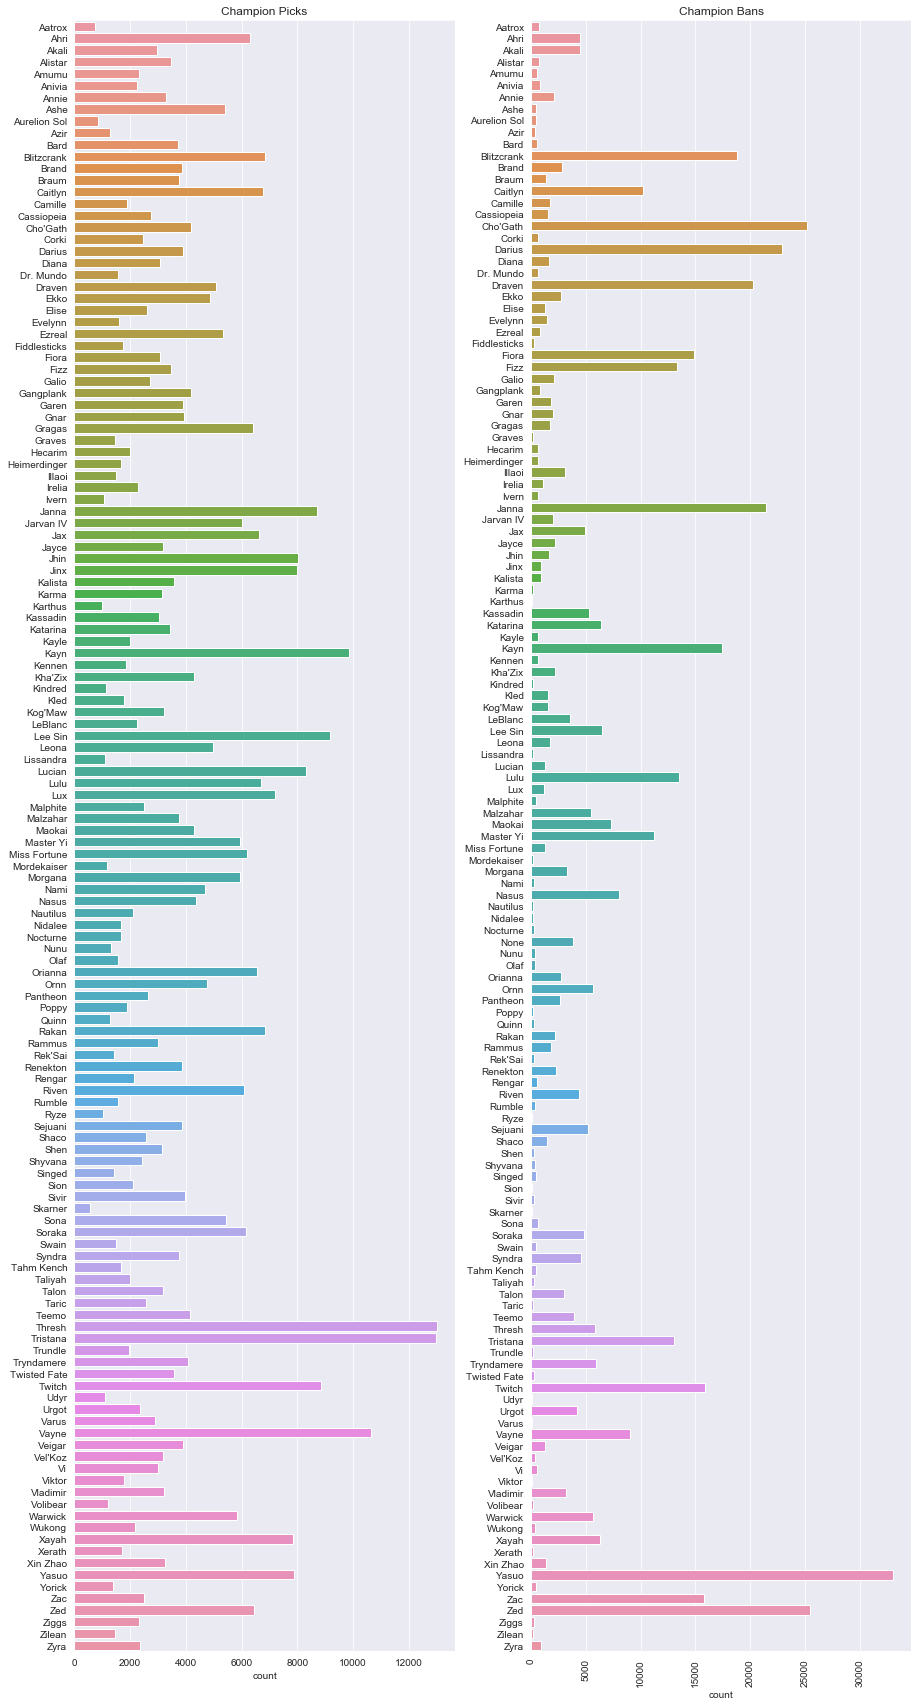

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,30))
plt.xticks(rotation=90)
sns.countplot(y=sortedPicks, data=df, ax=ax1)
sns.countplot(y=sortedBans, data=df, ax=ax2)
ax1.set_title('Champion Picks')
ax2.set_title('Champion Bans')

<h2>Let's See the Most and Least Played Champion Types</h2>

In [18]:
tagsCols = ['t1_champ1id_tags', 't1_champ2id_tags', 't1_champ3id_tags',
       't1_champ4id_tags', 't1_champ5id_tags', 't2_champ1id_tags',
       't2_champ2id_tags', 't2_champ3id_tags', 't2_champ4id_tags',
       't2_champ5id_tags']

In [19]:
tagsTotals = df[tagsCols].apply(pd.value_counts)
tagsTotals['count'] = tagsTotals[tagsCols].sum(axis=1)
tagsTotals

,t1_champ1id_tags,t1_champ2id_tags,t1_champ3id_tags,t1_champ4id_tags,t1_champ5id_tags,t2_champ1id_tags,t2_champ2id_tags,t2_champ3id_tags,t2_champ4id_tags,t2_champ5id_tags,count
Fighter,13362,12767,12961,12893,13530,13282,12998,13000,12897,13394,131084
Marksman,11413,12144,11939,12063,11247,11511,11939,11888,12062,11340,117546
Mage,9151,8674,8420,8591,8816,9016,8680,8716,8615,8776,87455
Support,6260,6790,6902,6887,6533,6491,6902,6843,6834,6654,67096
Tank,6130,6219,6421,6249,6142,6098,6174,6257,6233,6232,62155
Assassin,5174,4896,4847,4807,5222,5092,4797,4786,4849,5094,49564


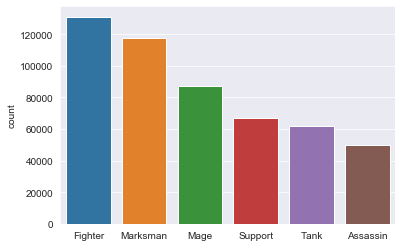

In [20]:
sns.barplot(x=tagsTotals.index,y=tagsTotals['count'])

<h2>Let's See the Most and Least Picked Summoner Spells</h2>

In [21]:
spellsTotals = df[sumSpellsCols].apply(pd.value_counts)
spellsTotals['count'] = spellsTotals[sumSpellsCols].sum(axis=1)
spellsTotals

,t1_champ1_sum1,t1_champ1_sum2,t1_champ2_sum1,t1_champ2_sum2,t1_champ3_sum1,t1_champ3_sum2,t1_champ4_sum1,t1_champ4_sum2,t1_champ5_sum1,t1_champ5_sum2,...,t2_champ1_sum2,t2_champ2_sum1,t2_champ2_sum2,t2_champ3_sum1,t2_champ3_sum2,t2_champ4_sum1,t2_champ4_sum2,t2_champ5_sum1,t2_champ5_sum2,count
Barrier,702,890,649,814,620,852,630,834,648,814,...,881,637,887,617,823,634,838,625,804,14880
Cleanse,160,199,151,153,135,168,136,134,125,182,...,190,129,159,136,182,154,181,149,184,3154
Exhaust,3640,4394,3904,4614,3928,4738,3992,4723,3763,4557,...,4459,3912,4596,3928,4704,3855,4717,3885,4511,84576
Flash,28164,22216,27998,22490,28019,22397,27988,22393,27966,22377,...,22204,28037,22427,28170,22255,28089,22322,27838,22589,504121
Ghost,744,798,678,706,647,750,664,689,720,800,...,761,715,706,690,712,672,737,665,711,14305
Heal,4581,5758,4922,6309,4902,6180,4971,6136,4500,5826,...,5934,4854,6197,4834,6173,4896,6276,4571,5746,108043
Ignite,3820,5205,3832,4930,3786,4894,3777,4982,3917,5093,...,5047,3823,4875,3758,4980,3715,4899,3956,5032,88258
Smite,4711,5635,4780,5520,4789,5511,4681,5579,4768,5550,...,5656,4690,5558,4621,5594,4894,5594,4777,5563,103062
Teleport,4968,6395,4576,5954,4664,6000,4651,6020,5083,6291,...,6358,4693,6085,4736,6067,4581,5926,5024,6350,109401


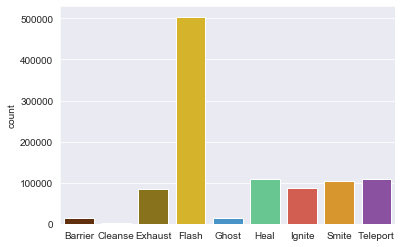

In [22]:
spellColors = ["#6E2C00","#1A5276","#9A7D0A","#F1C40F","#3498DB","#58D68D","#E74C3C","#F39C12","#8E44AD"]
sns.barplot(x=spellsTotals.index,y=spellsTotals['count'],palette=spellColors)

In [23]:
dataClean = df.replace([0,1,2],['neither','blue','red'])
dataClean.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t1_champ1id_tags,t1_champ2id_tags,t1_champ3id_tags,t1_champ4id_tags,t1_champ5id_tags,t2_champ1id_tags,t2_champ2id_tags,t2_champ3id_tags,t2_champ4id_tags,t2_champ5id_tags
0,3326086514,1504279457970,1949,9,blue,red,blue,blue,blue,blue,...,Mage,Support,Marksman,Assassin,Mage,Marksman,Marksman,Fighter,Assassin,Support
1,3229566029,1497848803862,1851,9,blue,blue,blue,blue,neither,blue,...,Marksman,Fighter,Assassin,Fighter,Assassin,Tank,Mage,Fighter,Fighter,Fighter
2,3327363504,1504360103310,1493,9,blue,red,blue,blue,blue,red,...,Marksman,Fighter,Support,Fighter,Assassin,Mage,Support,Fighter,Fighter,Marksman
3,3326856598,1504348503996,1758,9,blue,blue,blue,blue,blue,blue,...,Tank,Mage,Marksman,Mage,Fighter,Mage,Fighter,Support,Fighter,Marksman
4,3330080762,1504554410899,2094,9,blue,red,blue,blue,blue,blue,...,Fighter,Marksman,Support,Marksman,Mage,Support,Tank,Fighter,Assassin,Marksman


In [24]:
firsts = ['firstBlood','firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald']
firstTotals = dataClean[firsts].apply(pd.value_counts)
newIndex = ['blue','red','neither']
firstSort = firstTotals.reindex(index=newIndex)
firstSort

,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald
blue,26113,25861,23054,14758,24690,12948
red,24822,24416,22160,16474,24800,12363
neither,555,1213,6276,20258,2000,26179


<h2>Let's See Which Side of the Map Get's Certain Objectives More Often</h2>

![title](https://img.resized.co/dexerto/eyJkYXRhIjoie1widXJsXCI6XCJodHRwczpcXFwvXFxcL3MzLmV1LXdlc3QtMS5hbWF6b25hd3MuY29tXFxcL3BwbHVzLmltYWdlcy5kZXhlcnRvLmNvbVxcXC91cGxvYWRzXFxcL2FydGljbGVzXFxcL2xlYWd1ZS1vZi1sZWdlbmRzLW1hcC1jaGFuZ2VzLXJpb3QuanBnXCIsXCJ3aWR0aFwiOlwiXCIsXCJoZWlnaHRcIjpcIlwiLFwiZGVmYXVsdFwiOlwiaHR0cHM6XFxcL1xcXC9zMy1ldS13ZXN0LTEuYW1hem9uYXdzLmNvbVxcXC9wcGx1cy5pbWFnZXMuZGV4ZXJ0by5jb21cXFwvdXBsb2Fkc1xcXC8yMDE5XFxcLzExXFxcLzExMjE0OTQzXFxcL3BsYWNlaG9sZGVyLmpwZ1wifSIsImhhc2giOiIwYzE1NDc3NzMyMDJlOGRjZWFlYjAyNGIyNmM1ZjE5MTA2NzFlYTJiIn0=/league-of-legends-map-changes-riot.jpg)

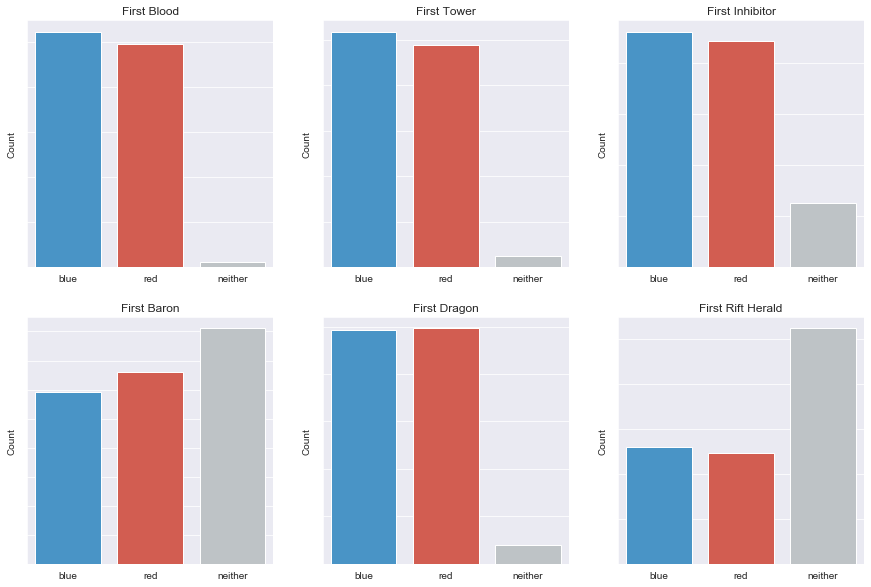

In [25]:
plotColors = ['#3498DB','#E74C3C','#BDC3C7']
firstLabels = ['First Blood','First Tower', 'First Inhibitor', 'First Baron', 'First Dragon', 'First Rift Herald']
nrows, ncols = 2,3
fig = plt.figure(figsize=(15,10))
for i in range(1,7):
    ax = fig.add_subplot(nrows,ncols,i)
    sns.barplot(x=firstSort.index,y=firstSort[firstSort.columns[i-1]],palette=plotColors)
    ax.set_ylabel('Count')
    ax.yaxis.set_ticklabels([])
    ax.set_title(firstLabels[i-1])

<h1>In Conclusion...</h1>
    <ul>
        <li>
        The most picked champions were Tristana and Thresh
        </li>
        <li>
        The most played type of champions were Fighters and the least played were Assassins
        </li>
        <li>
        The most used summoner spell was Flash and the least used was Cleanse.
        </li>
        <li>
        The blue side of the map tended to get more objectives first.
        </li>

![title](https://d.newsweek.com/en/full/845161/league-voice-coms.jpg)

<h1>Missing Data?</h1>
    <ul>
        <li>
        Runes for each Champion
        </li>
        <li>
            <ul>
                <li>
                    Can give us further insight into why certain types of champions were played more than others
                </li>
            </ul>
        </li>
        <li>
        Games from other regions
        </li>
        <li>
            <ul>
                <li>
                    Can show us differences between playstyles and champion preferences, etc. between regions
                </li>
            </ul>
        </li>
    </ul>